## Week 5 Grinstead, Snell

## Chapter 1

In [39]:
import random
random.seed(42)


In [ ]:
# 1

def coin_tosses_1(n):
    x = [random.randint(0, 1) for x in range(n)]

    heads = x.count(1)
    tails = x.count(0)
    print(f'Heads: {tails}')
    print(f'Tails: {tails}')
    
    h_prop = heads / len(x)
    t_prop = tails / len(x)

    print(h_prop - .5)
    print(t_prop - .5)

    return None

coin_tosses_1(10**6)

Heads: 499211
Tails: 499211
0.0007890000000000397
-0.0007889999999999842


In [87]:
# 2

def coin_tosses_2(n):

    # Set thresholds
    l_thresh = 0.4
    h_thresh = 0.6

    # Init counters
    in_thresh = 0
    counter = 0

    while in_thresh < 95:

        counter += 1

        # Random sample of coin flips of size n
        x = [random.randint(0, 1) for x in range(n)]
        heads = x.count(1)
        h_prop = heads / len(x)        

        # Increment if within threshold
        if h_prop > l_thresh and h_prop < h_thresh:
            in_thresh += 1

    print(counter)

    return None

coin_tosses_2(50)


138


In [ ]:
# 3

def galileo_figero(n):

    dice = 3
    nine, ten = 0, 0
    
    for i in range(n):
        nine += (sum(random.randint(1,6) for die in range(dice)) == 9)
        ten += (sum(random.randint(1,6) for die in range(dice)) == 10)
    print(nine / n)
    print(ten / n)

galileo_figero(10000)

0.1177
0.1232


In [ ]:
# 4

def federer():

    my_serve_rate = 0.6
    op_serve_rate = 0.5

    my_points = 0
    op_points = 0

    my_serve = True

    win_score = 21

    # While the game is ongoing
    while my_points < win_score and op_points <win_score:

        # A serve happens
        serve = random.random()

        # If its my serve
        if my_serve:
            print("It's your serve")     
            # And I score, give me a point
            if serve >= my_serve_rate:
                print('Won serve and point!')
                my_points += 1
            else:
                print("Lost serve")
                my_serve = False # Otherwise I lose my serve

        else:
            print("Your opponent serves")
            if serve >= op_serve_rate:
                print("They won the point")
                op_points += 1
                
            else:
                my_serve = True
                print("You won the point")
            
        print(f'Score is {my_points} - {op_points}')

    if my_points == win_score:
        print("You're the best")
    else:
        print("Good thing you're in a master's program")


federer()

It's your serve
Lost serve
Score is 0 - 0
Your opponent serves
You won the point
Score is 0 - 0
It's your serve
Lost serve
Score is 0 - 0
Your opponent serves
You won the point
Score is 0 - 0
It's your serve
Won serve and point!
Score is 1 - 0
It's your serve
Lost serve
Score is 1 - 0
Your opponent serves
You won the point
Score is 1 - 0
It's your serve
Lost serve
Score is 1 - 0
Your opponent serves
You won the point
Score is 1 - 0
It's your serve
Lost serve
Score is 1 - 0
Your opponent serves
You won the point
Score is 1 - 0
It's your serve
Won serve and point!
Score is 2 - 0
It's your serve
Lost serve
Score is 2 - 0
Your opponent serves
You won the point
Score is 2 - 0
It's your serve
Lost serve
Score is 2 - 0
Your opponent serves
You won the point
Score is 2 - 0
It's your serve
Lost serve
Score is 2 - 0
Your opponent serves
They won the point
Score is 2 - 1
Your opponent serves
They won the point
Score is 2 - 2
Your opponent serves
They won the point
Score is 2 - 3
Your opponent ser

In [135]:
# 5

def demoivre():

    dice = 3

    triple_six = False

    print(f'Probability of a triple six {((1/6)**3):.4f}')

    attempts = 0

    while triple_six == False:
        
        attempts += 1
        result = [random.randint(1,6) for die in range(dice)]

        # Check if all results are 6
        if all(die == 6 for die in result):
            triple_six = True

    print(f'Number of attempts to get triple six: {attempts:,}')

demoivre()
        

Probability of a triple six 0.0046
Number of attempts to get triple six: 608


## Chapter 2

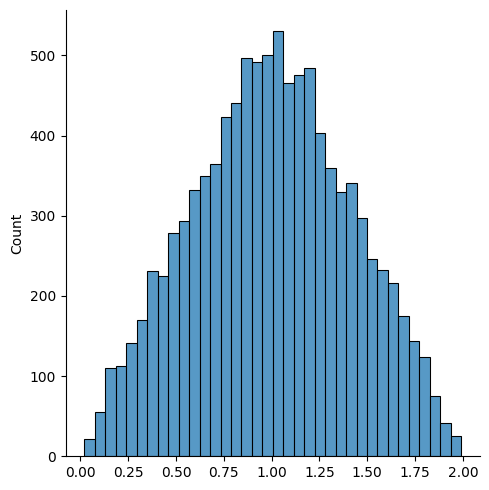

In [ ]:
# Example 2.4

import matplotlib.pyplot as plt
import random
import seaborn as sns

v = []

for i in range(10000):
    x = random.random()
    y = random.random()
    z = x + y
    v.append(z)

sns.displot(v)

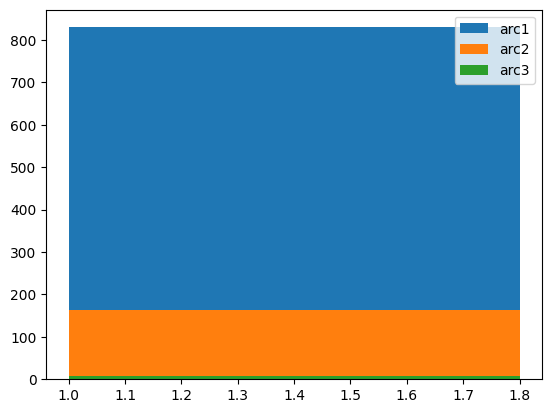

In [77]:
# Exercise 1

import math

def exercise_2_1(n):

    # This is one way to do it but not sure if it's a great way!
    # Divide unit circle into arcs of 1/2, 1/3, 1/6
    unit_circle_circumf = 2 * math.pi * 1 # unit circle, so radius of 1
    
    # Do I even need this? Can I not say that it is simply just a .5, .33, and .1667 chance respectively?
    # arc1 = (1/2) * unit_circle_circumf
    # arc2 = (1/3) * unit_circle_circumf
    # arc3 = (1/6) * unit_circle_circumf

    arc1 = 0.5
    arc2 = arc1 + 0.33   # Add each arc to each other to complete the circle
    arc3 = arc2 + 0.167

    results = {'arc1':[],
               'arc2':[],
               'arc3':[]}
    
    # Simulate a spin between 0 and 1
    for i in range(n):

        x = random.random()

        # Track results
        if x > 0 and x <= arc2:
            results['arc1'].append(1)
        elif x > arc1 and x <= arc3:
            results['arc2'].append(1)
        else:
            results['arc3'].append(1)

    plt.subplot()

    for arc in results:
        plt.bar(results[arc], height=sum(results[arc]), label = arc, align='edge')

    plt.legend()

exercise_2_1(1000)

In [199]:
# Exercise 3

def exercise_2_3(n):

    r = 0.5

    circle_area = math.pi * r ** 2
    print(circle_area)
    non_circle = 1 - circle_area

    hit = 0
    miss = 0

    for i in range(n):
        # Get random coord
        x = random.random()
        y = random.random()

        if x >= circle_area and y >= circle_area:
            miss += 1
        else:
            hit +=1

    print(hit / miss)

exercise_2_3(1000)

0.7853981633974483
17.181818181818183


## Chapter 5

$$
\binom{n}kp^kq^{n-k} = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
$$

In [ ]:
# binomial distribution simulation
import math

def binomial_dist(n):

    p = .5
    q = .5
    k = 10

    n_choose_k = math.factorial(n) / (math.factorial(k) * (math.factorial(n - k)))

    print(n_choose_k * p**k * q**(n-k))

binomial_dist()

0.00537109375
